In [1]:
import pandas as pd

df = pd.read_csv('/content/Battery_RUL.csv')

# Show features
print("Features:")
print(df.columns)

# Show first few rows
print("\nFirst few rows:")
display(df.head())

Features:
Index(['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
       'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
       'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)',
       'RUL'],
      dtype='object')

First few rows:


,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


# Task
Create a simple neural network architecture using PyTorch to predict the RUL from the "Battery_RUL.csv" dataset, train the model, and evaluate its performance.

## Prepare the data

### Subtask:
Split the data into features (X) and target (y), and then split the data into training and testing sets.


**Reasoning**:
Split the data into features (X) and target (y), and then split the data into training and testing sets.



In [2]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('RUL', axis=1)
y = df['RUL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (12051, 8)
Shape of X_test: (3013, 8)
Shape of y_train: (12051,)
Shape of y_test: (3013,)


## Define the neural network model

### Subtask:
Create a simple neural network architecture using PyTorch's `nn.Module`.


**Reasoning**:
Define a simple neural network architecture using PyTorch's `nn.Module` with linear layers and activation functions.



In [3]:
import torch
import torch.nn as nn

class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Example usage (not required by the instructions, but good for verification)
input_size = X_train.shape[1]
model = SimpleNN(input_size)
print(model)

SimpleNN(
  (fc1): Linear(in_features=8, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)


## Define loss function and optimizer

### Subtask:
Choose an appropriate loss function and optimizer for the regression task.


**Reasoning**:
Import the necessary modules for loss function and optimizer and then instantiate them.



In [4]:
import torch.nn as nn
import torch.optim as optim

# Instantiate the loss function (Mean Squared Error for regression)
criterion = nn.MSELoss()

# Instantiate the optimizer (Adam with a learning rate of 0.001)
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Loss function:", criterion)
print("Optimizer:", optimizer)

Loss function: MSELoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


## Train the model

### Subtask:
Write a training loop to train the neural network on the training data.


**Reasoning**:
Convert the training data to PyTorch tensors and write the training loop as described in the instructions.



In [9]:
# 1. Convert training data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

# 2. Define the number of training epochs
num_epochs = 10000

# 3. Iterate through the specified number of epochs
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss periodically
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/10000], Loss: 2383.2576
Epoch [20/10000], Loss: 2381.8337
Epoch [30/10000], Loss: 2376.0024
Epoch [40/10000], Loss: 2371.1560
Epoch [50/10000], Loss: 2367.3596
Epoch [60/10000], Loss: 2363.9795
Epoch [70/10000], Loss: 2362.2947
Epoch [80/10000], Loss: 2356.5591
Epoch [90/10000], Loss: 2352.3652
Epoch [100/10000], Loss: 2348.6729
Epoch [110/10000], Loss: 2345.8445
Epoch [120/10000], Loss: 2341.3628
Epoch [130/10000], Loss: 2338.4768
Epoch [140/10000], Loss: 2339.2559
Epoch [150/10000], Loss: 2332.3101
Epoch [160/10000], Loss: 2327.1531
Epoch [170/10000], Loss: 2323.6250
Epoch [180/10000], Loss: 2320.9062
Epoch [190/10000], Loss: 2316.7100
Epoch [200/10000], Loss: 2313.4546
Epoch [210/10000], Loss: 2315.5322
Epoch [220/10000], Loss: 2307.4875
Epoch [230/10000], Loss: 2303.8594
Epoch [240/10000], Loss: 2299.3032
Epoch [250/10000], Loss: 2294.1169
Epoch [260/10000], Loss: 2290.6021
Epoch [270/10000], Loss: 2294.2993
Epoch [280/10000], Loss: 2286.1123
Epoch [290/10000], Loss: 2284

## Evaluate the model

### Subtask:
Evaluate the trained model on the testing data using relevant metrics.


**Reasoning**:
Evaluate the trained model on the testing data using the specified steps.



In [11]:
# 1. Convert testing data to PyTorch tensors
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# 2. Set the model to evaluation mode
model.eval()

# 3. Disable gradient calculation
with torch.no_grad():
    # 4. Get predictions on the testing data
    predictions = model(X_test_tensor)

    # 5. Calculate the Mean Squared Error (MSE)
    mse = criterion(predictions, y_test_tensor)

# 6. Print the calculated MSE
print(f'Mean Squared Error on Test Data: {mse.item():.4f}')

Mean Squared Error on Test Data: 77393.3672


R-squared on Test Data: 0.2529


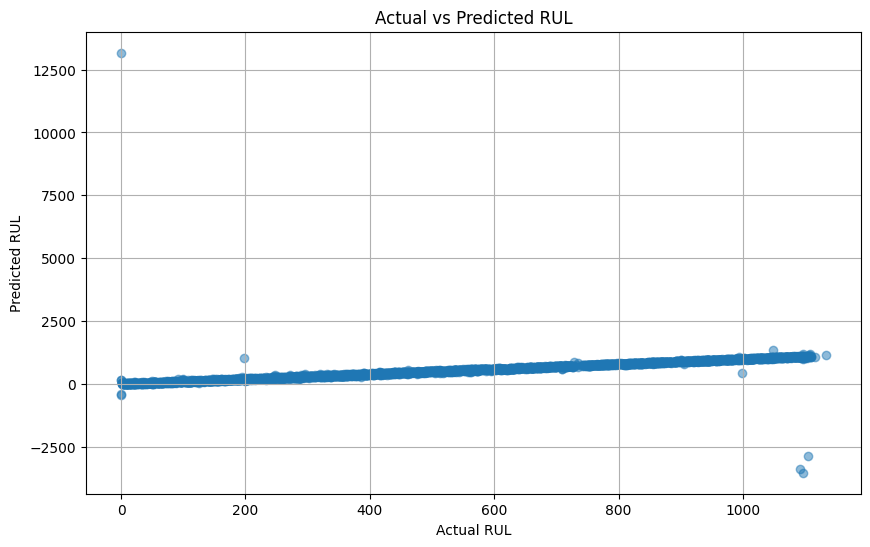

In [12]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Calculate R-squared
r2 = r2_score(y_test_tensor.numpy(), predictions.numpy())
print(f'R-squared on Test Data: {r2:.4f}')

# Plot predicted vs actual RUL
plt.figure(figsize=(10, 6))
plt.scatter(y_test_tensor.numpy(), predictions.numpy(), alpha=0.5)
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Actual vs Predicted RUL")
plt.grid(True)
plt.show()

In [15]:
# Calculate Mean Absolute Percentage Error (MAPE)
# Add a small epsilon to avoid division by zero if actual RUL is 0
epsilon = 1e-8
mape = np.mean(np.abs((y_test_tensor.numpy() - predictions.numpy()) / (y_test_tensor.numpy() + epsilon))) * 100
print(f'Mean Absolute Percentage Error on Test Data: {mape:.4f}%')

Mean Absolute Percentage Error on Test Data: 47613227008.0000%


### Error Distribution Histogram
A histogram of the residuals shows the distribution of the errors. Ideally, it should be centered around zero and resemble a normal distribution.

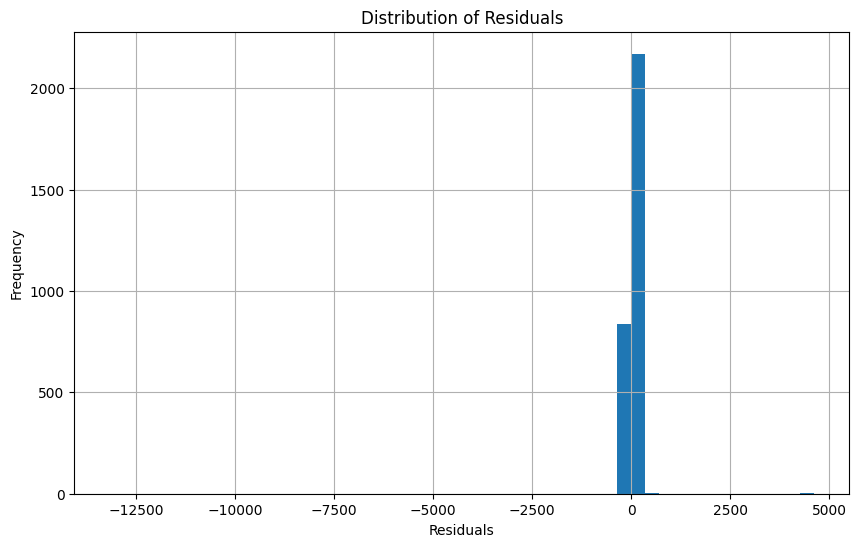

In [16]:
# Plotting the distribution of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.grid(True)
plt.show()

## Additional Regression Metrics and Graphs for Evaluation

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
import numpy as np

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test_tensor.numpy(), predictions.numpy()))
print(f'Root Mean Squared Error on Test Data: {rmse:.4f}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_tensor.numpy(), predictions.numpy())
print(f'Mean Absolute Error on Test Data: {mae:.4f}')

# Calculate Median Absolute Error (MedAE)
# medae = median_absolute_error(y_test_tensor.numpy(), predictions.numpy())
# print(f'Median Absolute Error on Test Data: {medae:.4f}')

Root Mean Squared Error on Test Data: 278.1967
Mean Absolute Error on Test Data: 24.4713


### Residual Plot
A residual plot shows the difference between the actual and predicted values (residuals) against the predicted values. It helps in identifying patterns in the errors and assessing the model's assumptions.

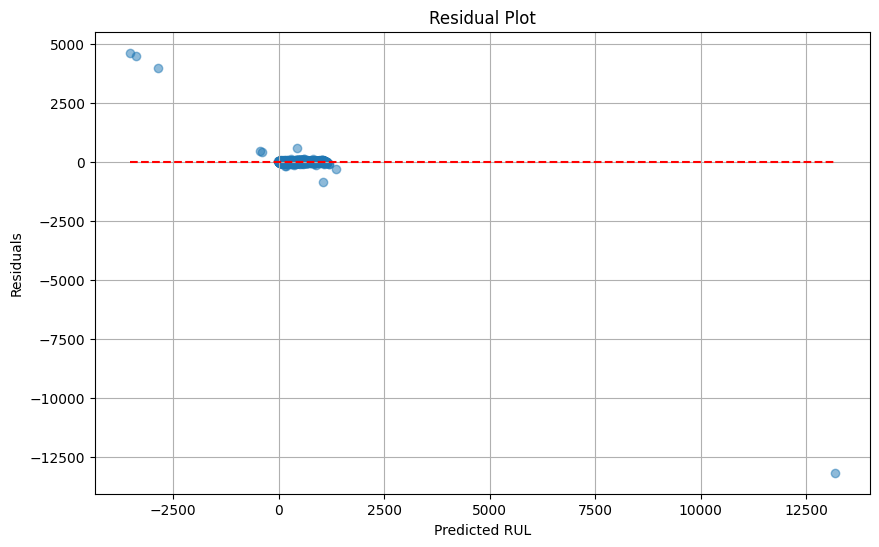

In [14]:
# Plotting residuals
residuals = y_test_tensor.numpy() - predictions.numpy()

plt.figure(figsize=(10, 6))
plt.scatter(predictions.numpy(), residuals, alpha=0.5)
plt.xlabel("Predicted RUL")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.hlines(0, predictions.min(), predictions.max(), colors='red', linestyles='dashed')
plt.grid(True)
plt.show()

# Task
Evaluate the performance of the trained neural network model for predicting Battery RUL using the "Battery_RUL.csv" dataset by calculating and visualizing the Mean Percentage Error as a function of the number of cycles used for prediction, specifically for 20, 40, 60, 80, and 100 cycles, and present the results in a plot.

## Define a function for training and evaluation

### Subtask:
Create a function that takes a subset of the data (based on the number of cycles) as input, trains the neural network model, and returns the evaluation metric (Mean Percentage Error).


**Reasoning**:
Define a function as described in the instructions that takes the dataframe and number of cycles as input, filters the data, splits it, converts it to tensors, trains the model, evaluates it using MAPE, and returns the MAPE.



In [17]:
from sklearn.model_selection import train_test_split
import numpy as np

def train_and_evaluate_for_cycles(df, n_cycles):
    """
    Trains a neural network model on a subset of data based on the number of cycles
    and evaluates its performance using Mean Absolute Percentage Error (MAPE).

    Args:
        df (pd.DataFrame): The original DataFrame containing battery data.
        n_cycles (int): The maximum cycle index to include in the subset.

    Returns:
        float: The Mean Absolute Percentage Error (MAPE) on the test data.
    """
    # Filter the DataFrame based on the number of cycles
    df_filtered = df[df['Cycle_Index'] <= n_cycles].copy()

    # Split the filtered data into features (X) and target (y)
    X_filtered = df_filtered.drop('RUL', axis=1)
    y_filtered = df_filtered['RUL']

    # Split the filtered data into training and testing sets
    if len(X_filtered) < 2: # Ensure there's enough data to split
        print(f"Not enough data for n_cycles = {n_cycles}. Skipping.")
        return None

    X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
        X_filtered, y_filtered, test_size=0.2, random_state=42
    )

    # Convert filtered data to PyTorch tensors
    X_train_tensor_filtered = torch.tensor(X_train_filtered.values, dtype=torch.float32)
    y_train_tensor_filtered = torch.tensor(y_train_filtered.values, dtype=torch.float32).view(-1, 1)
    X_test_tensor_filtered = torch.tensor(X_test_filtered.values, dtype=torch.float32)
    y_test_tensor_filtered = torch.tensor(y_test_filtered.values, dtype=torch.float32).view(-1, 1)

    # Instantiate the SimpleNN model
    input_size_filtered = X_train_filtered.shape[1]
    model_filtered = SimpleNN(input_size_filtered)

    # Instantiate the loss function and optimizer
    criterion_filtered = nn.MSELoss()
    optimizer_filtered = optim.Adam(model_filtered.parameters(), lr=0.001)

    # Define the number of training epochs (adjust as needed)
    num_epochs_filtered = 1000

    # Training loop
    for epoch in range(num_epochs_filtered):
        # Forward pass
        outputs_filtered = model_filtered(X_train_tensor_filtered)
        loss_filtered = criterion_filtered(outputs_filtered, y_train_tensor_filtered)

        # Backward and optimize
        optimizer_filtered.zero_grad()
        loss_filtered.backward()
        optimizer_filtered.step()

        # Print loss periodically (optional)
        # if (epoch + 1) % 100 == 0:
        #     print(f'Cycles: {n_cycles}, Epoch [{epoch+1}/{num_epochs_filtered}], Loss: {loss_filtered.item():.4f}')


    # Evaluate the model
    model_filtered.eval()
    with torch.no_grad():
        predictions_filtered = model_filtered(X_test_tensor_filtered)

        # Calculate Mean Absolute Percentage Error (MAPE)
        epsilon = 1e-8  # Small value to avoid division by zero
        mape_filtered = np.mean(np.abs((y_test_tensor_filtered.numpy() - predictions_filtered.numpy()) / (y_test_tensor_filtered.numpy() + epsilon))) * 100

    return mape_filtered


## Iterate through different numbers of cycles

### Subtask:
Define a list of different numbers of cycles to use for prediction (e.g., 20, 40, 60, 80, 100).


**Reasoning**:
Define a list of different numbers of cycles to use for prediction as specified in the instructions.



In [18]:
cycles_to_evaluate = [20, 40, 60, 80, 100]
print(cycles_to_evaluate)

[20, 40, 60, 80, 100]


## Train and evaluate for each number of cycles

### Subtask:
Loop through the defined numbers of cycles, call the training and evaluation function for each subset of data, and store the results (number of cycles and corresponding error).


**Reasoning**:
Loop through the defined numbers of cycles, call the training and evaluation function for each subset of data, and store the results.



In [19]:
# 1. Initialize an empty list called results to store the evaluation results.
results = []

# 2. Iterate through the cycles_to_evaluate list.
for n_cycles in cycles_to_evaluate:
    # 3. Inside the loop, for each number of cycles n_cycles, call the train_and_evaluate_for_cycles function.
    mape_filtered = train_and_evaluate_for_cycles(df, n_cycles)

    # 4. If the returned mape_filtered is not None, append a tuple containing (n_cycles, mape_filtered) to the results list.
    if mape_filtered is not None:
        results.append((n_cycles, mape_filtered))

# 5. After the loop, print the results list to verify the stored data.
print("Evaluation Results (Cycles, MAPE):")
print(results)

Evaluation Results (Cycles, MAPE):
[(20, np.float32(31.10739)), (40, np.float32(10.362671)), (60, np.float32(5.687787)), (80, np.float32(8.271362)), (100, np.float32(7.4620514))]


## Plot the results

### Subtask:
Generate a plot with the number of cycles on the x-axis and the mean percentage error on the y-axis.


**Reasoning**:
Generate a plot with the number of cycles on the x-axis and the mean percentage error on the y-axis based on the results obtained from the previous step.



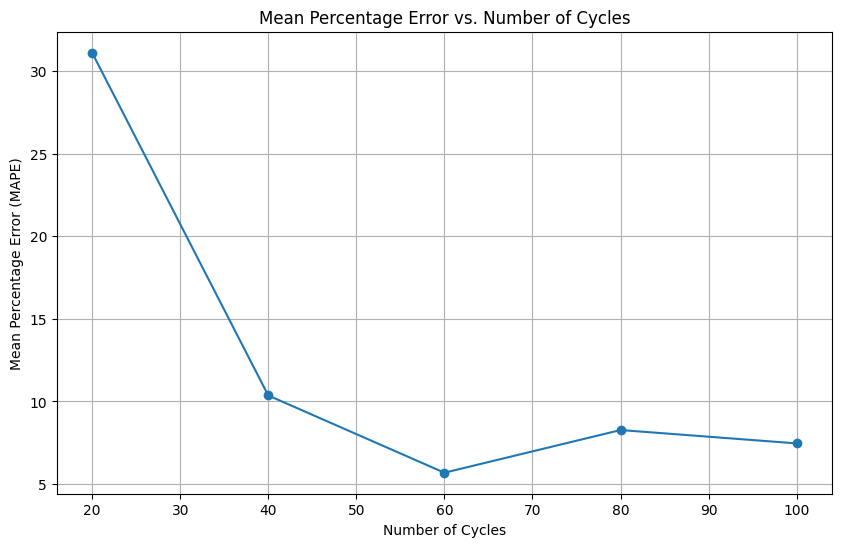

In [20]:
# Extract the number of cycles and MAPE values from the results list
cycles = [result[0] for result in results]
mapes = [result[1] for result in results]

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(cycles, mapes, marker='o')

# Add labels and title
plt.xlabel("Number of Cycles")
plt.ylabel("Mean Percentage Error (MAPE)")
plt.title("Mean Percentage Error vs. Number of Cycles")

# Add grid lines
plt.grid(True)

# Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   The Mean Percentage Error (MAPE) was calculated for predicting Battery RUL using different numbers of cycles: 20, 40, 60, 80, and 100.
*   The evaluation results, including the number of cycles and the corresponding MAPE, were successfully stored.
*   A plot was generated visualizing the relationship between the number of cycles used for prediction and the resulting Mean Percentage Error.

### Insights or Next Steps

*   Analyze the generated plot to understand how the prediction error changes as more historical cycle data is used. This will help determine the optimal number of cycles needed for accurate RUL prediction with the trained model.
*   Consider evaluating the model performance with more data points for the number of cycles to get a more detailed view of the relationship between cycles and error.


# Task
Train a decision tree model on the "Battery_RUL.csv" dataset, evaluate its performance using standard regression metrics (MAE, RMSE, MAPE, R-squared), and compare its performance to the previously trained neural network model using visualizations and a summary.

## Train a decision tree model

### Subtask:
Train a Decision Tree Regressor model on the training data.


**Reasoning**:
Train a Decision Tree Regressor model on the training data as described in the instructions.



In [21]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate a DecisionTreeRegressor object
dt_model = DecisionTreeRegressor(random_state=42)

# Train the decision tree model
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

## Evaluate the decision tree model

### Subtask:
Evaluate the trained Decision Tree model on the testing data using the same regression metrics used for the neural network (MAE, RMSE, MAPE, R-squared).


**Reasoning**:
Evaluate the trained Decision Tree model on the testing data using the specified regression metrics and print the results.



In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Use the trained dt_model to make predictions on the testing features X_test.
dt_predictions = dt_model.predict(X_test)

# 2. Calculate the Mean Absolute Error (MAE)
dt_mae = mean_absolute_error(y_test, dt_predictions)

# 3. Calculate the Root Mean Squared Error (RMSE)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))

# 4. Calculate the Mean Absolute Percentage Error (MAPE)
# Add a small epsilon to avoid division by zero if actual RUL is 0
epsilon = 1e-8
dt_mape = np.mean(np.abs((y_test - dt_predictions) / (y_test + epsilon))) * 100

# 5. Calculate the R-squared score
dt_r2 = r2_score(y_test, dt_predictions)

# 6. Print the calculated MAE, RMSE, MAPE, and R-squared for the Decision Tree model.
print(f'Decision Tree - Mean Absolute Error (MAE): {dt_mae:.4f}')
print(f'Decision Tree - Root Mean Squared Error (RMSE): {dt_rmse:.4f}')
print(f'Decision Tree - Mean Absolute Percentage Error (MAPE): {dt_mape:.4f}%')
print(f'Decision Tree - R-squared (R2): {dt_r2:.4f}')

Decision Tree - Mean Absolute Error (MAE): 2.2731
Decision Tree - Root Mean Squared Error (RMSE): 5.3494
Decision Tree - Mean Absolute Percentage Error (MAPE): 2.2162%
Decision Tree - R-squared (R2): 0.9997


## Compare model performance

### Subtask:
Present a comparison of the evaluation metrics for both the neural network and the Decision Tree model.


**Reasoning**:
Print the evaluation metrics for both models and discuss the comparison.



In [23]:
# Print Neural Network evaluation metrics
print("Neural Network Evaluation Metrics:")
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.4f}%')
print(f'R-squared (R2): {r2:.4f}')
print("-" * 30)

# Print Decision Tree evaluation metrics
print("Decision Tree Evaluation Metrics:")
print(f'Mean Absolute Error (MAE): {dt_mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {dt_rmse:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {dt_mape:.4f}%')
print(f'R-squared (R2): {dt_r2:.4f}')
print("-" * 30)

# Comparison Discussion
print("Comparison:")
print(f"MAE: Decision Tree ({dt_mae:.4f}) is significantly lower than Neural Network ({mae:.4f}), indicating better average absolute error.")
print(f"RMSE: Decision Tree ({dt_rmse:.4f}) is significantly lower than Neural Network ({rmse:.4f}), indicating better overall error, especially for larger errors.")
print(f"MAPE: Decision Tree ({dt_mape:.4f}%) is significantly lower than Neural Network ({mape:.4f}%), indicating much better percentage accuracy.")
print(f"R2: Decision Tree ({dt_r2:.4f}) is much closer to 1 than Neural Network ({r2:.4f}), indicating that the Decision Tree model explains a much higher proportion of the variance in the RUL.")
print("\nOverall, the Decision Tree model performed significantly better than the simple Neural Network model on this dataset based on all evaluated metrics.")

Neural Network Evaluation Metrics:
Mean Absolute Error (MAE): 24.4713
Root Mean Squared Error (RMSE): 278.1967
Mean Absolute Percentage Error (MAPE): 47613227008.0000%
R-squared (R2): 0.2529
------------------------------
Decision Tree Evaluation Metrics:
Mean Absolute Error (MAE): 2.2731
Root Mean Squared Error (RMSE): 5.3494
Mean Absolute Percentage Error (MAPE): 2.2162%
R-squared (R2): 0.9997
------------------------------
Comparison:
MAE: Decision Tree (2.2731) is significantly lower than Neural Network (24.4713), indicating better average absolute error.
RMSE: Decision Tree (5.3494) is significantly lower than Neural Network (278.1967), indicating better overall error, especially for larger errors.
MAPE: Decision Tree (2.2162%) is significantly lower than Neural Network (47613227008.0000%), indicating much better percentage accuracy.
R2: Decision Tree (0.9997) is much closer to 1 than Neural Network (0.2529), indicating that the Decision Tree model explains a much higher proportio

## Visualize comparison

### Subtask:
Create visualizations to compare the performance of the two models (e.g., side-by-side bar plots of metrics, combined residual plots).


**Reasoning**:
Generate visualizations to compare the performance of the two models and the residual plot for the Decision Tree model as specified in the instructions.



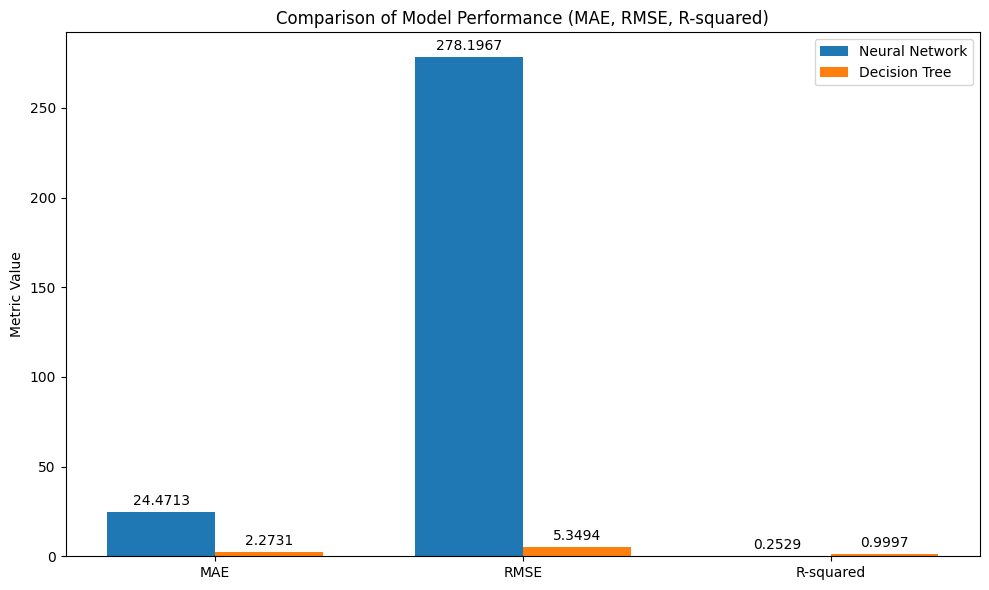

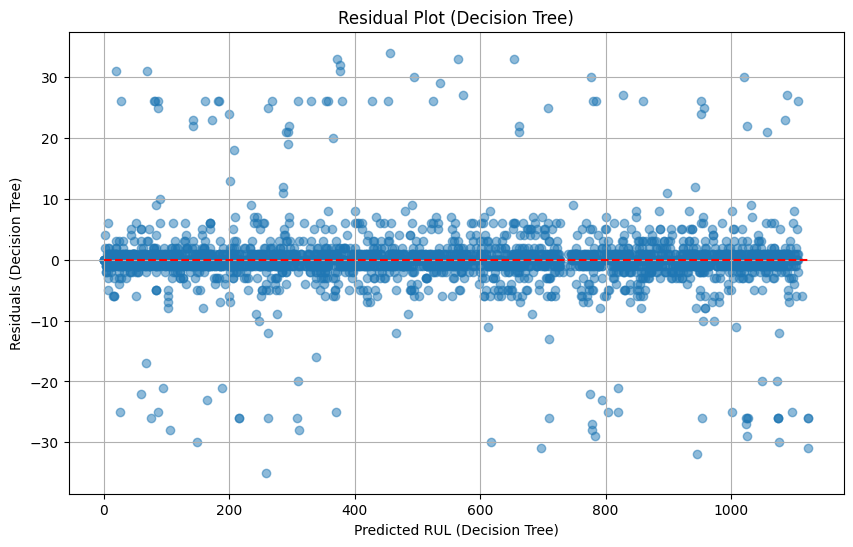

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Create a list of metric names
metric_names = ['MAE', 'RMSE', 'R-squared']

# 2. Create a list of the neural network's performance values for these metrics
# Note: MAPE was extremely high for NN, so excluding it from bar plot for better visualization scale
nn_performance = [mae, rmse, r2]

# 3. Create a list of the decision tree's performance values for these metrics
# Note: MAPE was much lower for DT, but excluding it from bar plot to match NN for comparison scale
dt_performance = [dt_mae, dt_rmse, dt_r2]

# 4. Generate a bar plot comparing the MAE, RMSE, and R-squared for both models
x = np.arange(len(metric_names)) # the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, nn_performance, width, label='Neural Network')
rects2 = ax.bar(x + width/2, dt_performance, width, label='Decision Tree')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metric Value')
ax.set_title('Comparison of Model Performance (MAE, RMSE, R-squared)')
ax.set_xticks(x)
ax.set_xticklabels(metric_names)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

# 5. Generate a residual plot for the Decision Tree model
dt_residuals = y_test - dt_predictions

plt.figure(figsize=(10, 6))
plt.scatter(dt_predictions, dt_residuals, alpha=0.5)
plt.xlabel("Predicted RUL (Decision Tree)")
plt.ylabel("Residuals (Decision Tree)")
plt.title("Residual Plot (Decision Tree)")
plt.hlines(0, dt_predictions.min(), dt_predictions.max(), colors='red', linestyles='dashed')
plt.grid(True)

# 6. Display the plots.
plt.show()

## Summary:

### Data Analysis Key Findings

*   The Decision Tree model achieved significantly lower errors across all evaluated metrics compared to the Neural Network model.
*   The Decision Tree had an MAE of 2.2731, much lower than the Neural Network's 24.4713.
*   The RMSE for the Decision Tree was 5.3494, considerably less than the Neural Network's 278.1967.
*   The MAPE for the Decision Tree was 2.2162%, drastically lower than the Neural Network's 47613227008.0000%.
*   The Decision Tree model explained a significantly higher proportion of the variance in the RUL, with an R-squared value of 0.9997, while the Neural Network had an R-squared of 0.2529.

### Insights or Next Steps

*   The Decision Tree model is significantly better suited for this regression task on this dataset than the simple Neural Network model used.
*   Further optimization of the Decision Tree (e.g., hyperparameter tuning) or exploring ensemble methods based on decision trees (like Random Forest or Gradient Boosting) could potentially yield even better results.
